## Convolution Neural Network for Computer Vision

#### Reference: Deep Learning with Python, 2nd Edition Chapter 8 or Chapter 5 of the 1st Edition

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [17]:
# define a small convent
inputs = Input(shape=(28, 28, 1))

x = inputs
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.8)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
outputs = Dense(10, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)

In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          9248

In [19]:
from keras.datasets import mnist

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_images.shape

(60000, 28, 28, 1)

### Build the model

In [21]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

# validation_split means spare 20% sample out of the input training dataset as validation dataset
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split = 0.2)

Epoch 1/20
750/750 [==============================] - 14s 18ms/step - loss: 0.3902 - accuracy: 0.8804 - val_loss: 0.1842 - val_accuracy: 0.9442
Epoch 2/20
750/750 [==============================] - 14s 19ms/step - loss: 0.1335 - accuracy: 0.9581 - val_loss: 0.0985 - val_accuracy: 0.9705
Epoch 3/20
750/750 [==============================] - 16s 21ms/step - loss: 0.0955 - accuracy: 0.9702 - val_loss: 0.1142 - val_accuracy: 0.9657
Epoch 4/20
750/750 [==============================] - 17s 22ms/step - loss: 0.0756 - accuracy: 0.9762 - val_loss: 0.0763 - val_accuracy: 0.9765
Epoch 5/20
750/750 [==============================] - 16s 22ms/step - loss: 0.0646 - accuracy: 0.9794 - val_loss: 0.0795 - val_accuracy: 0.9763
Epoch 6/20
750/750 [==============================] - 17s 23ms/step - loss: 0.0555 - accuracy: 0.9823 - val_loss: 0.0703 - val_accuracy: 0.9791
Epoch 7/20
750/750 [==============================] - 22s 30ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 0.0618 - val_accuracy:

In [ ]:
### Plot learning Curves

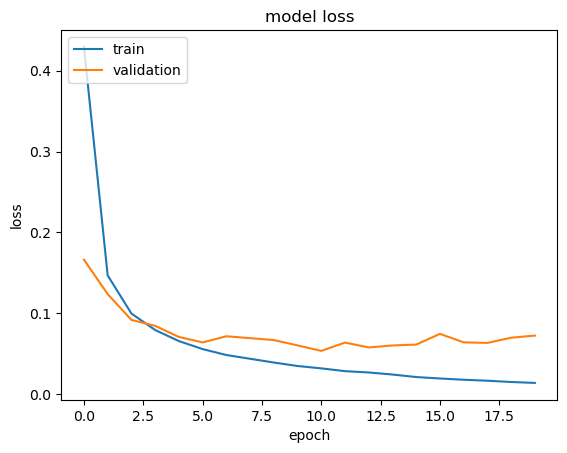

In [9]:
# summarize history for los
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

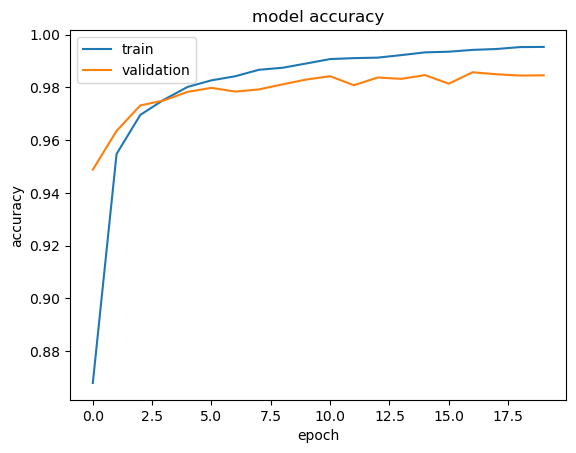

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### The validation error starts to increase after 9 epochs. So after 10 epoch, we are probably in an overfit situation

In [ ]:
### Evaluating the model out-of-sample

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0689 - accuracy: 0.9862
Test accuracy: 0.986


***99% accuracy is wonderful***

### You should try different model, especially test what happens if you miss the MaxPooling

In [12]:
# define a small convent
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = Flatten()(x)
outputs = Dense(10, activation="softmax")(x)
model2 = Model(inputs=inputs, outputs=outputs)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [13]:
# warning: take a lot of time to run
#model2.compile(optimizer="rmsprop",
#    loss="sparse_categorical_crossentropy",
#    metrics=["accuracy"])
#model2.fit(train_images, train_labels, epochs=5, batch_size=64)

In [14]:
#test_loss, test_acc = model.evaluate(test_images, test_labels)
#print(f"Test accuracy: {test_acc:.3f}")